In [1]:
import sympy
from sympy import Matrix, Rational, sqrt, symbols, zeros, simplify, exp
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
%matplotlib notebook


# Linear algebra

## Session 9: 

## Gerhard Jäger

### December 21, 2023

## Eigenvectors and eigenvalues

### Basic equation

$$
A\mathbf x = \lambda \mathbf x
$$

- $\mathbf x$ is called an **eigenvector** of $A$
- $\lambda$ is called an **eigenvalue** of $A$

In [2]:
A = np.array([
    [1, 1],
    [-1, 1]
])

<IPython.core.display.Javascript object>


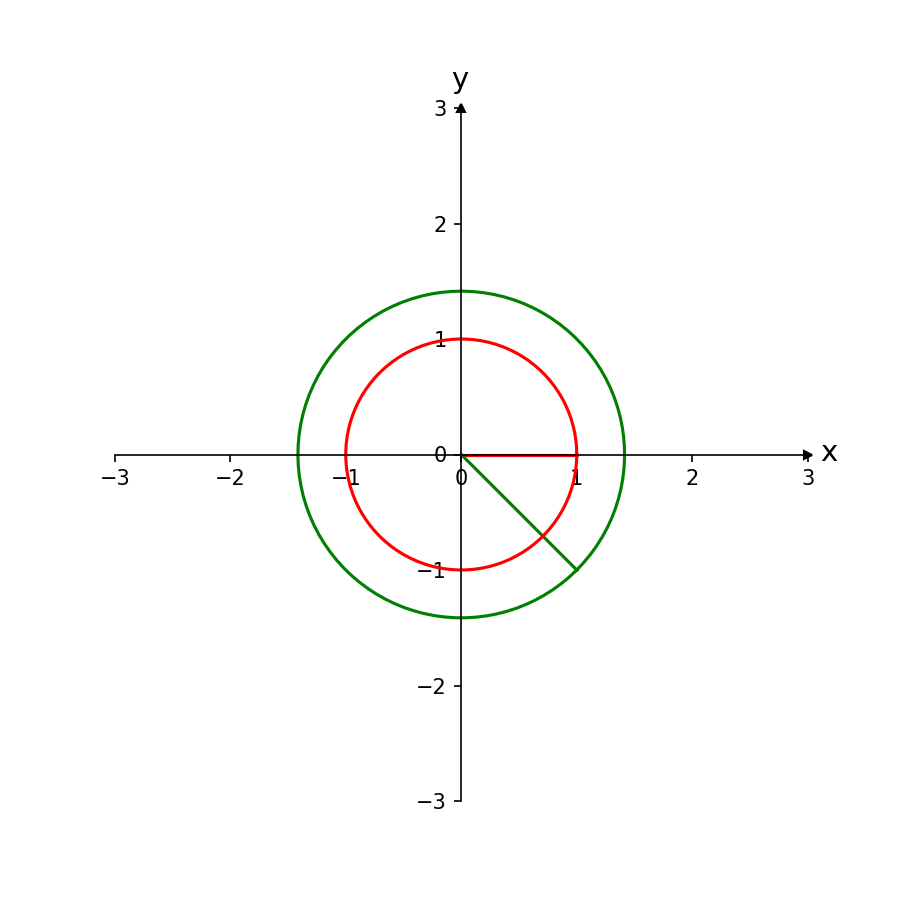

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, step=0.01), Output())…

In [3]:

def g(A, theta):
    a, c = np.cos(theta), np.sin(theta)
    x = np.linspace(0, a, 100)
    y = np.linspace(0, c, 100)
    b, d = A @ np.array([a,c])
    z = np.linspace(0, b, 100)
    w = np.linspace(0, d, 100)
    return x, y, z, w

fig, ax = plt.subplots(figsize=(6,6))
xmin, xmax, ymin, ymax = -2, 2, -2, 2
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

x, y, z, w = g(A, 0)
line1, = ax.plot(x,y, color='red')
line2, = ax.plot(z,w, color='green')

angles = np.linspace(0, 2*np.pi, 100)
crc = np.array([np.cos(angles), np.sin(angles)])
elps = A @ crc
ax.plot(crc[0,:], crc[1,:], color='red')
ax.plot(elps[0,:], elps[1,:], color='green')

def update(theta = 0):
    x, y, z, w = g(A,theta)
    print("x = "+str(x[-1])+","+str(y[-1]))
    print("y = "+str(z[-1])+","+str(w[-1]))
    line1.set_data(x, y)
    line2.set_data(z, w)
    fig.canvas.draw_idle()
    
interact(update, theta = (0, 2*np.pi, 0.01));

### Example: How to find eigenvalues and eigenvectors

$$
\begin{aligned}
A &= \left[\begin{matrix}0.8 & 0.3\\0.2 & 0.7\end{matrix}\right]\\
A\mathbf x &= \lambda \mathbf x\\
&= \lambda \mathbf I \mathbf x\\
(A-\lambda \mathbf I)\mathbf x &= \mathbf 0 
\end{aligned}
$$

The important matrix now is

$$
A-\lambda \mathbf I = \begin{bmatrix}
0.8-\lambda & 0.3\\
0.2 & 0.7-\lambda
\end{bmatrix}
$$

We are looking for a value of $\lambda$ such that
$$
(A-\lambda \mathbf I)\mathbf x = \mathbf 0 
$$

with $\mathbf x \neq \mathbf 0$ (otherwise the equation would be trivial).

It follows that $(A-\lambda \mathbf I)$ is not invertible. Hence:

$$
|(A-\lambda \mathbf I)| = 0
$$

Using the formula for the determinant of a $2\times 2$ matrix:

$$
(0.8-\lambda)(0.7-\lambda) - 0.2\times 0.3 = 0
$$


Simplifying:

$$
\begin{aligned}
(0.8-\lambda)(0.7-\lambda) - 0.2\times 0.3 &= 0\\
\lambda ^2 - 1.5\lambda + 0.56 - 0.06 &= 0\\
\lambda^2 - 1.5\lambda + 0.5 &= 0
\end{aligned}
$$

There is a formula for finding the solution of quadratic equations (https://en.wikipedia.org/wiki/Quadratic_equation):

$$
\begin{aligned}
\lambda_{1/2} = \frac{3}{4} \pm \sqrt{(\frac{3}{4})^2-\frac{1}{2}}\\
&= \frac{3}{4} \pm \sqrt{\frac{9-8}{16}}\\
&= \frac{3}{4} \pm \sqrt{\frac{1}{16}}\\
&= \frac{3}{4} \pm \frac{1}{4}\\
\lambda_1 &= 1\\
\lambda_2 &= 0.5
\end{aligned}
$$

$\lambda_1$ and $\lambda_2$ are the eigenvalues of $A$. Now let's find the corresponding eigenvectors.

This amount to finding the nullspace of $A-\lambda\mathbf I$:

- $\lambda_1$

$$
\begin{aligned}
(A - \lambda_1\mathbf I)\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
-0.2 & 0.3\\
0.2 & -0.3
\end{bmatrix}\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
-0.2 & 0.3\\
0 & 0
\end{bmatrix}\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
1 & -1.5\\
0 & 0
\end{bmatrix}\mathbf x_1 &= \mathbf 0\\
\mathbf x_1 &= \begin{bmatrix}1.5\\1\end{bmatrix}
\end{aligned}
$$




- $\lambda_2$

$$
\begin{aligned}
(A - \lambda_2\mathbf I)\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
0.3 & 0.3\\
0.2 & 0.2
\end{bmatrix}\mathbf x_2 &= \mathbf 0\\
\begin{bmatrix}
0.3 & 0.3\\
0 & 0
\end{bmatrix}\mathbf x_2 &= \mathbf 0\\
\begin{bmatrix}
1 & 1\\
0 & 0
\end{bmatrix}\mathbf x_2 &= \mathbf 0\\
\mathbf x_2 &= \begin{bmatrix}-1\\1\end{bmatrix}\\
\end{aligned}
$$

$\mathbf x_1$ is the eigenvector *corresponding to* $\lambda_1$.

$\mathbf x_2$ is the eigenvector *corresponding to* $\lambda_2$.

Any non-zero multiples of $\mathbf x_1, \mathbf x_2$ are also eigenvectors. It is common practice to use normalized eigenvectors, i.e.\ eigenvectors with length 1.

$$
\begin{aligned}
\mathbf v_1 &= \frac{\mathbf x_1}{||\mathbf x_1||}\\
&= \frac{1}{\sqrt{13}}\begin{bmatrix}3\\2\end{bmatrix}\\
\mathbf v_2 &= \frac{\mathbf x_1}{||\mathbf x_1||}\\
&= \frac{1}{\sqrt{2}}\begin{bmatrix}-1\\1\end{bmatrix}\\
\end{aligned}
$$

In [4]:
A = Matrix([
    [Rational(4,5), Rational(3,10)],
    [Rational(1,5), Rational(7,10)]
])
A

Matrix([
[4/5, 3/10],
[1/5, 7/10]])

In [5]:
e1, e2 = A.eigenvects()

In [6]:
lambda1, _, v1 = e1

In [7]:
lambda1

1/2

In [8]:
v1[0].normalized()

Matrix([
[-sqrt(2)/2],
[ sqrt(2)/2]])

In [9]:
lambda2, _, v2 = e2

In [10]:
lambda2

1

In [11]:
v2[0].normalized()

Matrix([
[3*sqrt(13)/13],
[2*sqrt(13)/13]])

In [12]:
A = np.array([
    [0.8, 0.3],
    [0.2, 0.7]
])
A

array([[0.8, 0.3],
       [0.2, 0.7]])

In [13]:
np.linalg.eig(A)

(array([1. , 0.5]),
 array([[ 0.83205029, -0.70710678],
        [ 0.5547002 ,  0.70710678]]))



### Procedure to find eigenvalues and eigenvectors:

1. Construct $A-\lambda \mathbf I$ with $\lambda$ as unknown.
2. Set $|A-\lambda \mathbf I| = 0$ and solve for $\lambda$. All solutions are eigenvalues.
3. For each solution for $\lambda$, find the nullspace of $|A-\lambda \mathbf I| = 0$. Each vector in the nullspace is an eigenvector corresponding to this solution.

##### Example 2: Projection matrix

$$
A = \begin{bmatrix}
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
\frac{1}{2}-\lambda & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}-\lambda
\end{vmatrix} &= 0\\
(\frac{1}{2}-\lambda)^2 - \frac{1}{4} &= 0\\
\lambda^2 -\lambda &= 0\\
\lambda(\lambda-1) &= 0\\
\lambda_1 &= 1\\
\lambda_2 &= 0
\end{aligned}
$$

- find eigenvectors

    - $\lambda_1$: 
    $$
    \begin{aligned}
    \begin{bmatrix}
    -\frac{1}{2} & \frac{1}{2}\\
    \frac{1}{2} & -\frac{1}{2}
    \end{bmatrix}\mathbf x_1 &= \mathbf 0\\
    \mathbf x_1 &= \begin{bmatrix}1\\1\end{bmatrix}
    \end{aligned}
    $$
    
    - $\lambda_2$:
    $$
    \begin{aligned}
    \begin{bmatrix}
    \frac{1}{2} & \frac{1}{2}\\
    \frac{1}{2} & \frac{1}{2}
    \end{bmatrix}\mathbf x_2 &= \mathbf 0\\
    \mathbf x_2 &= \begin{bmatrix}-1\\1\end{bmatrix}
    \end{aligned}
    $$

##### Example 3: Reflection matrix

$$
A = \begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
-\lambda & 1\\
1 & -\lambda
\end{vmatrix} &= 0\\
\lambda^2-1 &= 0\\
\lambda^2 &= 1\\
\lambda_1 &= 1\\
\lambda_2 &= -1
\end{aligned}
$$

- find eigenvectors

    - $\lambda_1$: 
    $$
    \begin{aligned}
    \begin{bmatrix}
    -1 & 1\\
    1 & -1
    \end{bmatrix}\mathbf x_1 &= \mathbf 0\\
    \mathbf x_1 &= \begin{bmatrix}1\\1\end{bmatrix}
    \end{aligned}
    $$
    
    - $\lambda_2$:
    $$
    \begin{aligned}
    \begin{bmatrix}
    1 & 1\\
    1 & 1
    \end{bmatrix}\mathbf x_2 &= \mathbf 0\\
    \mathbf x_2 &= \begin{bmatrix}-1\\1\end{bmatrix}
    \end{aligned}
    $$

##### Example 4: Rotation matrix

$$
A = \begin{bmatrix}
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\
-\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
\frac{\sqrt{2}}{2}-\lambda & \frac{\sqrt{2}}{2}\\
-\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}-\lambda
\end{vmatrix} &= 0\\
(\frac{\sqrt{2}}{2}-\lambda)^2 + \frac{1}{2} &= 0\\
\lambda^2 - \sqrt{2}\lambda + 1 &= 0\\
\lambda_{1/2} &= \frac{\sqrt{2}}{2} \pm \sqrt{\frac{1}{2} - 1}\\
 &= \frac{\sqrt{2}}{2} \pm \sqrt{-\frac{1}{2}}
\end{aligned}
$$

**There is no solution within the real numbers!**

(There are complex eigenvalues – and complex eigenvectors – for this matrix, but this is beyond the scope of this course.)

##### Example 5: Multiple eigenvalues
$$
A = \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
1-\lambda & 0\\
0 & 1-\lambda
\end{vmatrix} &= 0\\
(1-\lambda)^2 &= 0\\
1-\lambda &= 0\\
\lambda &= 1
\end{aligned}
$$

- find eigenvectors

$$
\begin{bmatrix}
0 & 0\\
0 & 0
\end{bmatrix}\mathbf x = \mathbf 0
$$

**Any vector is an eigenvector of the identity matrix.**

##### Example 6: Defective eigenvalues

$$
A = \begin{bmatrix}
1 & 1\\
0 & 1
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
1-\lambda & 1\\
0 & 1-\lambda
\end{vmatrix} &= 0\\
(1-\lambda)^2 &= 0\\
1-\lambda &= 0\\
\lambda &= 1
\end{aligned}
$$

- find eigenvectors

$$
\begin{aligned}
\begin{bmatrix}
0 & 1\\
0 & 0
\end{bmatrix}
\mathbf x &= \mathbf 0\\
\mathbf x &= \begin{bmatrix}1\\0\end{bmatrix}
\end{aligned}
$$

**This matrix has only one eigenvalue and one eigenvector.**

### Larger matrices

$$
A = \begin{bmatrix}
-1 & 2 & 2\\
2 & 2 & -1\\
2 & -1 & 2
\end{bmatrix}
$$

- finding eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
-1-\lambda & 2 & 2\\
2 & 2-\lambda & -1\\
2 & -1 & 2-\lambda
\end{vmatrix} &= 0\\
(-1-\lambda)(2-\lambda)^2 -4 -4 -4(2-\lambda)-4(2-\lambda) + 1 + \lambda &= 0\\
-\lambda^2+4\lambda-4-\lambda^3+4\lambda^2-4\lambda -4 -4 -8+4\lambda-8+4\lambda + 1 + \lambda &= 0\\
-\lambda^3 + 3\lambda^2 + 9\lambda - 27&= 0\\
\lambda^3 - 3\lambda^2 - 9\lambda + 27&= 0
\end{aligned}
$$


In the general case, solving a cubic equation by hand is very hard. In this particular example, the solution is:

$$
\begin{aligned}
\lambda^3 - 3\lambda^2 - 9\lambda + 27 &= (\lambda -3)^2 (\lambda+3)\\
\lambda_1 &= 3\\
\lambda_2 &= -3
\end{aligned}
$$





- eigenvectors

In [14]:
A = Matrix([
    [-1,2,2],
    [2,2,-1],
    [2,-1,2]
])
A

Matrix([
[-1,  2,  2],
[ 2,  2, -1],
[ 2, -1,  2]])

In [15]:
A.eigenvals()

{-3: 1, 3: 2}

(In this dictionary, the keys are the eigenvalues and the values are the *algebraic multiplicity*.)

In [16]:
e1, e2 = A.eigenvects()

In [17]:
e1[0]

-3

In [18]:
e1[2][0]

Matrix([
[-2],
[ 1],
[ 1]])

In [19]:
e2[0]

3

In [20]:
e2[2][0]

Matrix([
[1/2],
[  1],
[  0]])

In [21]:
e2[2][1]

Matrix([
[1/2],
[  0],
[  1]])

Note that there are two eigenvectors corresponding to the eigenvalue 3.

In [22]:
A = Matrix([
    [-1,2,3],
    [4,5,6],
    [7,8,9]
])
A

Matrix([
[-1, 2, 3],
[ 4, 5, 6],
[ 7, 8, 9]])

In [23]:
e1, e2, e3 = A.eigenvects()

In [24]:
e1[0]

13/3 + (-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3) + 307/(9*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))

In [25]:
e1[2][0]

Matrix([
[     306/89 + 63*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)/89 - 4*(13/3 + (-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3) + 307/(9*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)))**2/89 + 2149/(89*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))],
[-959/267 - 13508/(801*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) + 7*(13/3 + (-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3) + 307/(9*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)))**2/178 - 44*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)/89],
[                                                                                                                                                                                                                                                                                               1]])

In [26]:
e2[0]

13/3 + 307/(9*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)

In [27]:
e2[2][0]

Matrix([
[     306/89 + 2149/(89*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) - 4*(13/3 + 307/(9*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))**2/89 + 63*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)/89],
[-959/267 - 44*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)/89 + 7*(13/3 + 307/(9*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))**2/178 - 13508/(801*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))],
[                                                                                                                                                                                                                                                                                               1]])

In [28]:
e3[0]

13/3 + 307/(9*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (4969/27 + sqrt(471498)*I/9)**(1/3)

In [29]:
e3[2][0]

Matrix([
[     306/89 + 2149/(89*(4969/27 + sqrt(471498)*I/9)**(1/3)) - 4*(13/3 + 307/(9*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (4969/27 + sqrt(471498)*I/9)**(1/3))**2/89 + 63*(4969/27 + sqrt(471498)*I/9)**(1/3)/89],
[-959/267 - 44*(4969/27 + sqrt(471498)*I/9)**(1/3)/89 + 7*(13/3 + 307/(9*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (4969/27 + sqrt(471498)*I/9)**(1/3))**2/178 - 13508/(801*(4969/27 + sqrt(471498)*I/9)**(1/3))],
[                                                                                                                                                                                                           1]])

In [30]:
A = Matrix([
    [0,-3,2,-1],
    [-3,9,-6,3],
    [2,-6,4,-2],
    [-1, 3, -2, 2]
])
A

Matrix([
[ 0, -3,  2, -1],
[-3,  9, -6,  3],
[ 2, -6,  4, -2],
[-1,  3, -2,  2]])

In [31]:
A.eigenvects()

[(0,
  1,
  [Matrix([
   [  0],
   [2/3],
   [  1],
   [  0]])]),
 (5 + (-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3) + 76/(3*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)),
  1,
  [Matrix([
   [             -66 - 1216/(3*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)) + (5 + (-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3) + 76/(3*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)))**2 - 16*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)],
   [-189/13 - 1140/(13*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)) + 3*(5 + (-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3) + 76/(3*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)))**2/13 - 45*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)/13],
   [  126/13 + 30*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)/13 - 2*(5 + (-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3) + 76/(3*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(131007)*I/9)**(1/3)))**2/13 + 760/(13*(-1/2 - sqrt(3)*I/2)*(121 + sqrt(13100

### Facts about eigenvalues and eigenvectors

- An $n\times n$ matrix has between 0 and $n$ eigenvalues.
- Each eigenvalue has a certain *algebraic multiplicity* between $1$ and $n$.
- The sum of the algebraic multiplicities is $\leq n$.
- For each eigenvalue, there is a number $k$ of eigenvectors. $k$ is between $1$ and the algebraic multiplicity of the eigenvalue.
- The number of eigenvectors for an eigenvalue is called its *geometric multiplicity*.

## Eigenspaces


- **Eigenspaces** are fundamental concepts in linear algebra, associated with eigenvalues and eigenvectors of a matrix.
- **Definition:** The eigenspace of an eigenvalue is the set of all vectors that, when multiplied by the matrix, result in a vector that is a scalar multiple of the original vector.
- **Mathematically:** If $A$ is a matrix and λ is an eigenvalue, then the eigenspace of λ is the set of all vectors 
$\mathbf v$ satisfying 
$$
A\mathbf v=λ\mathbf v
$$


### Computing Eigenspaces

To find the eigenspace of an eigenvalue:

1. **Determine Eigenvalues**: Solve $ \det(A - \lambda I) = 0 $ to find the eigenvalues $\lambda$.
2. **Find Eigenvectors**: Solve $ (A - \lambda I)\mathbf v = 0 $ for each eigenvalue to find the corresponding eigenvectors $ \mathbf v $.
3. **Form Eigenspace**: The set of all eigenvectors, including the zero vector, forms the eigenspace for the eigenvalue.

**Example**: For matrix $ A $ and eigenvalue $ \lambda $, the eigenspace is the solution to $ A\mathbf v = \lambda \mathbf v $.


### Properties and Applications of Eigenspaces

**Properties**:
- The eigenspace of an eigenvalue is a linear subspace.
- Dimension of the eigenspace is the geometric multiplicity of the eigenvalue.

**Applications**:
- Used in diagonalization of matrices.
- Important in fields like quantum mechanics, vibrations analysis, facial recognition, and more.

**Conclusion**: Understanding eigenspaces is crucial for grasping the behavior of linear transformations and matrices.


### Triangular matrices

$$
\begin{aligned}
A &= 
\begin{bmatrix}
1 & 4 & 1\\
0 & 6 & 4\\
0 & 0 & 2
\end{bmatrix}\\
A -\lambda \mathbf I &= 
\begin{vmatrix}
1-\lambda & 4 & 1\\
0 & 6-\lambda & 4\\
0 & 0 & 2-\lambda 
\end{vmatrix}\\
&= 0\\
(1-\lambda)(6-\lambda)(2-\lambda) &= 0\\
\lambda_1 &= 6\\
\lambda_2 &= 2\\
\lambda_3 &= 1
\end{aligned}
$$

**In triangular matrices, the diagonal entries are the eigenvalues.**

## Matrix diagonalization

Let $A$ be an $n\times n$ matrix, which has $n$ **linearly independent eigenvectors** $\mathbf v_1,\ldots, \mathbf v_n$. (This means that the algebraic and the geometric multiplicities both sum up to $n$.)

Let 

$$
V = \begin{bmatrix}
| & \cdots & |\\
\mathbf v_1&\cdots & \mathbf v_n\\
| & \cdots & |\\
\end{bmatrix}
$$

Let $\lambda_1, \ldots, \lambda_n$ be the corresponding eigenvalues.

$$
\begin{aligned}
A\mathbf v_1 &= \lambda_1 \mathbf v_1\\
 & \vdots \\
A\mathbf v_n &= \lambda_1 \mathbf v_n
\end{aligned}
$$



In matrix notation:

$$
\begin{aligned}
A\begin{bmatrix}
| & \cdots & |\\
\mathbf v_1&\cdots & \mathbf v_n\\
| & \cdots & |\\
\end{bmatrix} &= 
\begin{bmatrix}
| & \cdots & |\\
\mathbf \lambda_1 v_1&\cdots & \lambda_n \mathbf v_n\\
| & \cdots & |\\
\end{bmatrix}\\
AV &= \begin{bmatrix}
| & \cdots & |\\
\mathbf \lambda_1 v_1&\cdots & \lambda_n \mathbf v_n\\
| & \cdots & |\\
\end{bmatrix}\\
AV &= V\begin{bmatrix}
\lambda_1 & \cdots & 0\\
0 & \ddots & 0\\
0 & \cdots & \lambda_n
\end{bmatrix}
\end{aligned}
$$


Let $\Lambda$ be the diagonal matrix with $\lambda_1,\ldots,\lambda_n$ as diagonal entries.

$$
AV = V\Lambda
$$

By assumption, $V$ has independent columns, so it is invertible. Therefore

$$
A = V\Lambda V^{-1}
$$

It also holds that:

$$
V^{-1}AV = \Lambda
$$

This operation is called **diagonalization** of $A$, since $A$ is converted to a diagonal matrix.

### Example

$$
\begin{aligned}
A &= \left[\begin{matrix}0.8 & 0.3\\0.2 & 0.7\end{matrix}\right]\\
V &= 
\begin{bmatrix}
3 & -1\\
2 & 1
\end{bmatrix}\\
\Lambda &= \begin{bmatrix}
1 & 0\\
0 & 0.5
\end{bmatrix}\\
V^{-1} &= 
\begin{bmatrix}
0.2 & 0.2\\
-0.4 & 0.6
\end{bmatrix}\\
A &= V \Lambda V^{-1}\\
\left[\begin{matrix}0.8 & 0.3\\0.2 & 0.7\end{matrix}\right] &=
\begin{bmatrix}
3 & -1\\
2 & 1
\end{bmatrix}\begin{bmatrix}
1 & 0\\
0 & 0.5
\end{bmatrix}\begin{bmatrix}
0.2 & 0.2\\
-0.4 & 0.6
\end{bmatrix}\\
\Lambda &= V^{-1}AV\\
\begin{bmatrix}
1 & 0\\
0 & 0.5
\end{bmatrix} &= \begin{bmatrix}
0.2 & 0.2\\
-0.4 & 0.6
\end{bmatrix}\left[\begin{matrix}0.8 & 0.3\\0.2 & 0.7\end{matrix}\right]\begin{bmatrix}
3 & -1\\
2 & 1
\end{bmatrix}
\end{aligned}
$$


### Matrix power

Suppose $\lambda, \mathbf v$ are an eigenvalue and a corresponding eigenvector of $A$.

$$
\begin{aligned}
A\mathbf v &= \lambda \mathbf v\\
A^2\mathbf v &= A\lambda \mathbf v\\
&= \lambda A\mathbf v\\
&= \lambda ^2 \mathbf v
\end{aligned}
$$

$\mathbf v$ is also an eigenvector of $A^2$, and $\lambda^2$ is the corresponding eigenvalue.

Likewise, $\mathbf v$ is also an eigenvector of $A^k$, and $\lambda^k$ is the corresponding eigenvalue.

### Matrix power

Suppose $A$ is diagonalizable.

$$
\begin{aligned}
A &= V\Lambda V^{-1}\\
A^2 &= V\Lambda V^{-1}V\Lambda V^{-1}\\
&= V\Lambda^2V^{-1}\\
&\vdots\\
A^k &= V\Lambda^nV^{-1}\\
&= V
\begin{bmatrix}
\lambda_1^k & \cdots & 0\\
0 & \ddots & 0\\
0 & \cdots & \lambda_n^k
\end{bmatrix}
V^{-1}\\
\end{aligned}
$$



### Matrix inverse

Suppose $A$ is a invertible matrix, $\lambda$ is an eigenvalue, and $\mathbf v$ a corresponding eigenvector .

$$
\begin{aligned}
A^{-1}A &= \mathbf I\\
A^{-1}A\mathbf v &= \mathbf v\\
A^{-1}\lambda\mathbf v &= \mathbf v\\
A^{-1}\mathbf v &= \lambda^{-1}\mathbf v\\
\end{aligned}
$$

- $\mathbf v$ is also an eigenvector of $A^{-1}$.
- The corresponding eigenvalue is $\lambda^{-1}$.

If $A$ is also diagonlizabe as $A = P\Lambda P^{-1}$, then

$$
A^{-1} = P \Lambda^{-1}P^{-1}
$$


## Matrix exponential

If $A$ is diagonalizable:

$$
e^A = V
\begin{bmatrix}
e^\lambda_1 & \cdots & 0\\
0 & \ddots & 0\\
0 & \cdots & ^e\lambda_n
\end{bmatrix}
V^{-1}\\
$$



## Defective matrices

**Defective Matrices** are square matrices that lack a complete set of linearly independent eigenvectors.

- **Characteristics**:
  - Cannot be diagonalized.
  - The geometric multiplicity of at least one eigenvalue is less than its algebraic multiplicity.
- **Implications**:
  - Standard techniques like diagonalization are not directly applicable.
  - Requires alternative methods for analysis, like Jordan canonical form.

### Algebraic vs Geometric Multiplicity

The concept of a defective matrix is rooted in the difference between algebraic and geometric multiplicities of eigenvalues.

- **Algebraic Multiplicity**: The number of times an eigenvalue appears as a root of the characteristic polynomial.
- **Geometric Multiplicity**: The number of linearly independent eigenvectors associated with an eigenvalue (= the dimensionality of the corresponding eigenspace).

**Defective Matrix Criterion**: A matrix is defective if, for any eigenvalue, its geometric multiplicity is less than its algebraic multiplicity.


### Diagonalization and Defective Matrices

Diagonalization is a key concept in understanding defective matrices.

- **Diagonalizable Matrix**: Can be expressed as $$P^{-1}AP = \Lambda,$$ where $ A $ is the matrix, $ P $ contains the eigenvectors, and $ \Lambda $ is a diagonal matrix of eigenvalues.
- **Defective Matrix**: Lacks enough linearly independent eigenvectors to form matrix $ P $, making diagonalization impossible.

**Result**: Alternative methods, like *Jordan canonical form*, are needed to analyze defective matrices.


### Example of a Defective Matrix

Consider the matrix $$ A = \begin{pmatrix} 5 & 4 \\ -1 & 1 \end{pmatrix} $$.

- **Characteristic Polynomial**: $$ (5 - \lambda)(1 - \lambda) + 4,$$ leads to a single eigenvalue $\lambda = 3$ with algebraic multiplicity 2.
- **Eigenvectors**: Solving $$(A - 3I)\mathbf v = 0$$ yields only one linearly independent eigenvector, $\begin{pmatrix}-2\\1\end{pmatrix}$.

**Conclusion**: Matrix $A$ is defective as it has fewer linearly independent eigenvectors than the algebraic multiplicity of its eigenvalue.

### Working with Defective Matrices

Handling defective matrices requires alternative approaches:

- **Jordan Canonical Form**: A way to bring matrices to a nearly diagonal form, useful for defective matrices.
- **Applications**:
  - In fields where diagonalization is crucial but not directly applicable.
  - In studying systems with complex or repeated eigenvalues.




### Jordan Canonical Form: An Introduction

**Jordan Canonical Form** (JCF) is a fundamental concept in linear algebra for simplifying the study of linear transformations and matrices.

- **Purpose**: Provides a simplified form for matrices, especially useful for non-diagonalizable (defective) matrices.
- **Structure**: Consists of Jordan blocks along its diagonal, representing the eigenvalues of the matrix.


### Understanding Jordan Blocks

A **Jordan Block** is a key component of the Jordan Canonical Form.

- **Definition**: A square matrix with an eigenvalue repeated along the main diagonal, ones on the superdiagonal, and zeros elsewhere.
- **Example**:
  - A 3x3 Jordan block for eigenvalue $ \lambda $ looks like:
    $$
    \begin{pmatrix}
    \lambda & 1 & 0 \\
    0 & \lambda & 1 \\
    0 & 0 & \lambda
    \end{pmatrix}
    $$

**Significance**: Each Jordan block corresponds to an eigenvalue and its associated generalized eigenvectors.


### Generalized Eigenvectors

**Generalized Eigenvectors** are essential in constructing the Jordan Canonical Form.

- **Definition**: Vectors that are not eigenvectors but satisfy $$(A - \lambda I)^k v = 0$$ for some integer $$k > 1$$.
- **Role**: Used when a matrix does not have enough linearly independent eigenvectors (defective matrix).
- **Significance**: Help in forming the Jordan blocks where each block corresponds to an eigenvalue and its generalized eigenvectors.


### Example

$$
\begin{aligned}
A &= \begin{pmatrix}
5 & 4\\
-1 &1
\end{pmatrix}\\
\lambda &= 3\\
A-\lambda\mathbf I &= \begin{pmatrix}
2 & 4\\
-1 &-2
\end{pmatrix}\\
(A-\lambda\mathbf I)^2 &= \begin{pmatrix}
0 & 0\\
0 &0
\end{pmatrix}\\
\end{aligned}
$$

- eigenvector: $\begin{pmatrix}2\\-1\end{pmatrix}$
- generalized eigenvector: $\begin{pmatrix}1\\0\end{pmatrix}$
- Jordan Canonical Form:

$$
\begin{aligned}
A &= 
\begin{pmatrix}
2 &1\\
-1 & 0
\end{pmatrix}
\begin{pmatrix}
3 &1\\
0 & 3
\end{pmatrix}
\begin{pmatrix}
0 &-1\\
1 & 2
\end{pmatrix}
\end{aligned}
$$


### Applications of Jordan Canonical Form

**Jordan Canonical Form** is used for:

- **Simplifying Matrix Powers and Polynomials**:
  - Easier computation of $ A^n $ for matrix powers.
- **Computing Matrix Exponential**:
  - Useful in solving systems of linear differential equations by simplifying $ e^{At} $.
- **Theoretical Analysis**:
  - Provides insights into the structure and behavior of linear transformations.

*Note*: The next slides detail the computation of matrix powers and exponentials using JCF.


### Computing Matrix Power using JCF

To compute $ A^n $ for a defective matrix $ A $:

There is a matrix $P$ such that each column is a generalized eigenvector of $A$, allowing the following decomposition (we will skip the algorithm how to find $P$):

1. **JCF Decomposition**:
   - Decompose $ A $ into its JCF, $$ A = PJP^{-1} $$.
2. **Compute Power of JCF**:
   - Compute $ J^n $, which is simpler due to the Jordan block structure.
3. **Transform Back**:
   - Compute $$ A^n = PJ^nP^{-1} $$.

*Example*: For a Jordan block $$ J = \begin{pmatrix} \lambda & 1 \\ 0 & \lambda \end{pmatrix}, $$ $ J^n $ involves $ \lambda^n $ and terms with powers of $ n $.


# Computing Matrix Exponential using JCF

To compute the matrix exponential $ e^{At} $:

1. **JCF Decomposition**:
   - Decompose $ A $ into its JCF, $ A = PJP^{-1}$.
2. **Exponential of JCF**:
   - Compute $ e^{Jt} $, easier for Jordan blocks.
3. **Transform Back**:
   - Compute $ e^{At} = Pe^{Jt}P^{-1} $.

*Example*: For a Jordan block $$ J = \begin{pmatrix} \lambda & 1 \\ 0 & \lambda \end{pmatrix}, $$ $ e^{Jt} $ involves $ e^{\lambda t} $ and terms with $ t $:

$$
e^{Jt} = \begin{pmatrix}
e^{\lambda t} & te^{\lambda t}\\
0 & e^{\lambda t}
\end{pmatrix}
$$


**Sympy**

In [32]:
A = Matrix([[5, 4], [-1, 1]])

A


Matrix([
[ 5, 4],
[-1, 1]])

In [33]:
P, J = A.jordan_form()
print("J: ")
J

J: 


Matrix([
[3, 1],
[0, 3]])

In [34]:
print("P: ")
P

P: 


Matrix([
[ 2, 1],
[-1, 0]])

In [35]:
P * J * P.inv()

Matrix([
[ 5, 4],
[-1, 1]])

In [36]:
t, k = symbols("t k")

In [37]:
J**k

Matrix([
[3**k, 3**(k - 1)*k],
[   0,         3**k]])

In [38]:
exp(t*J)

Matrix([
[exp(3*t), t*exp(3*t)],
[       0,   exp(3*t)]])

In [39]:
A = Matrix([
    [4, 0, 0, 1],
    [0, 4, 1, 0],
    [0, 0, 4, 0],
    [0, 0, 0, 4]
])
A

Matrix([
[4, 0, 0, 1],
[0, 4, 1, 0],
[0, 0, 4, 0],
[0, 0, 0, 4]])

In [40]:
P, J = A.jordan_form()
print("J: ")
J

J: 


Matrix([
[4, 1, 0, 0],
[0, 4, 0, 0],
[0, 0, 4, 1],
[0, 0, 0, 4]])

In [41]:
print("P: ")
P

P: 


Matrix([
[0, 0, 1, 0],
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 0, 1]])

In [42]:
J**k

Matrix([
[4**k, 4**(k - 1)*k,    0,            0],
[   0,         4**k,    0,            0],
[   0,            0, 4**k, 4**(k - 1)*k],
[   0,            0,    0,         4**k]])

In [43]:
exp(t*J)

Matrix([
[exp(4*t), t*exp(4*t),        0,          0],
[       0,   exp(4*t),        0,          0],
[       0,          0, exp(4*t), t*exp(4*t)],
[       0,          0,        0,   exp(4*t)]])